In [1]:
from collections import deque

In [2]:
# Create a deque
my_deque = deque()

In [3]:
# Append elements to the right end
my_deque.append(10)
my_deque.append(20)

# Pop elements from the right end
print(my_deque.pop())  # Output: 20


20


In [4]:
# Append elements to the left end
my_deque.appendleft(5)

# Pop elements from the left end
print(my_deque.popleft())  # Output: 5


5


In [5]:
# Create a bounded deque with a maximum size of 3
bounded_deque = deque(maxlen=3)

# Append elements to the bounded deque
bounded_deque.append(1)
bounded_deque.append(2)
bounded_deque.append(3)
bounded_deque.append(4)

print(bounded_deque)  # Output: deque([2, 3, 4], maxlen=3)


deque([2, 3, 4], maxlen=3)


In [6]:
# Rotate the deque to the right by 2 positions
my_deque.rotate(2)

# Rotate the deque to the left by 1 position
my_deque.rotate(-1)


In [7]:
print(my_deque)

deque([10])


## Plot some comparisons for list and deque

In [8]:
import sys
import matplotlib.pyplot as plt

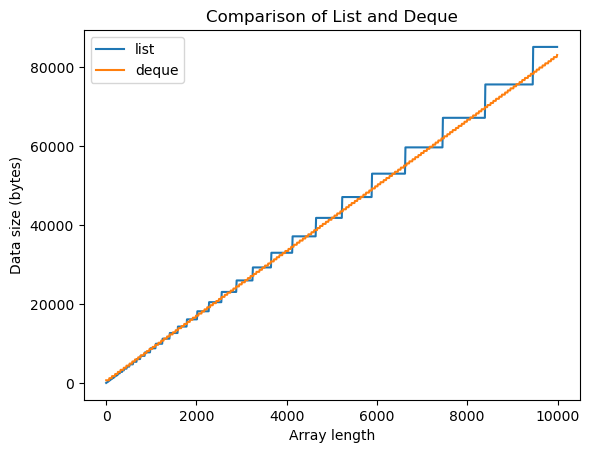

In [9]:
# Size of objects in memory (using sys.getsizeof)
# Make lists/deques of increasing length
list_bytes = []
deque_bytes = []
for length in range(1, 10000, 10):
    list_ = [i for i in range(length)]
    list_bytes.append(sys.getsizeof(list_))
    deque_bytes.append(sys.getsizeof(deque(list_)))

x = [i for i in range(1, 10000, 10)]

# Plot them. Note the step pattern of list because of overhead memory allocation
fig, ax = plt.subplots(1)
ax.plot(x, list_bytes, label="list")
ax.plot(x, deque_bytes, label="deque")
#ax.set_xscale("log")
ax.set_title("Comparison of List and Deque")
ax.set_xlabel("Array length")
ax.set_ylabel("Data size (bytes)")
ax.legend()
plt.show()

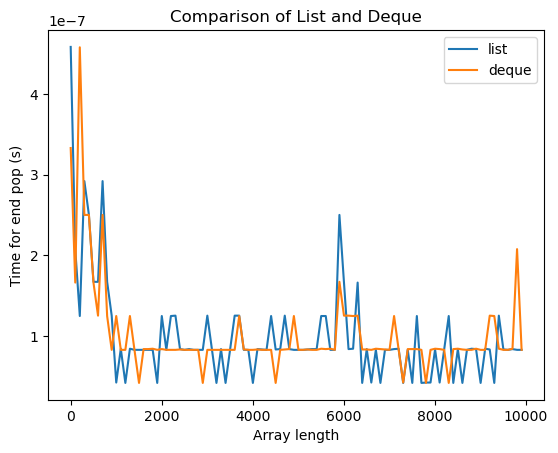

In [10]:
# Time end popping (using timeit)
import timeit

list_end_pop_time = []
deque_end_pop_time = []
for length in range(1, 10000, 100):
    test_list = [i for i in range(length)]
    test_deque = deque(test_list)
    list_end_pop_time.append(timeit.timeit(lambda: test_list.pop(), number=1))
    deque_end_pop_time.append(timeit.timeit(lambda: test_deque.pop(), number=1))

x = [i for i in range(1, 10000, 100)]

# Plot it. Times bounce around but are basically the same
fig, ax = plt.subplots(1)
ax.plot(x, list_end_pop_time, label="list")
ax.plot(x, deque_end_pop_time, label="deque")
#ax.set_xscale("log")
ax.set_title("Comparison of List and Deque")
ax.set_xlabel("Array length")
ax.set_ylabel("Time for end pop (s)")
ax.legend()
plt.show()

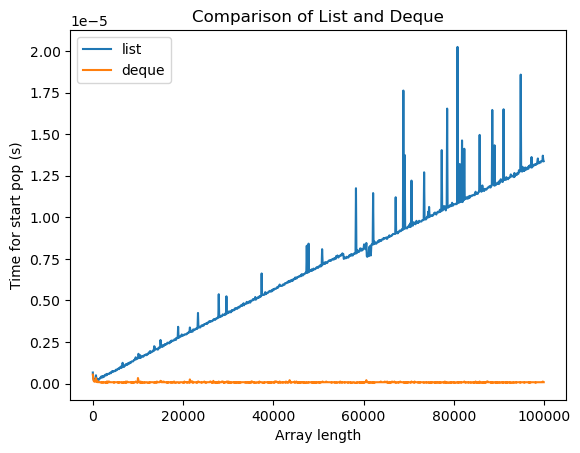

In [11]:
# Time popping first item
list_start_pop_time = []
deque_start_pop_time = []
x = []
for length in range(1, 100000, 100):
    x.append(length)
    test_list = [i for i in range(length)]
    test_deque = deque(test_list)
    list_start_pop_time.append(timeit.timeit(lambda: test_list.pop(0), number=1))
    deque_start_pop_time.append(timeit.timeit(lambda: test_deque.popleft(), number=1))

# Plot it. List gets slower with more length, deque does not
fig, ax = plt.subplots(1)
ax.plot(x, list_start_pop_time, label="list")
ax.plot(x, deque_start_pop_time, label="deque")
#ax.set_xscale("log")
ax.set_title("Comparison of List and Deque")
ax.set_xlabel("Array length")
ax.set_ylabel("Time for start pop (s)")
ax.legend()
plt.show()